<a href="https://colab.research.google.com/github/Marcel-Milosz/Dane/blob/Code-Review/Milosz_Marcel_05_niestacj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.36445475 0.18083229]
[25.93806989 18.27064327]


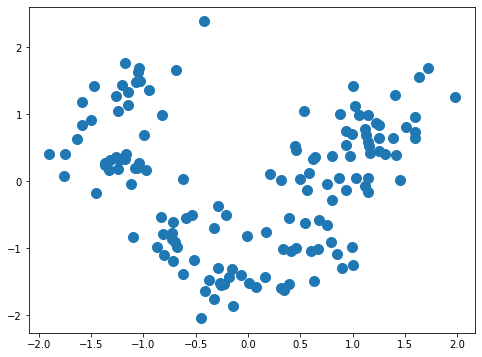

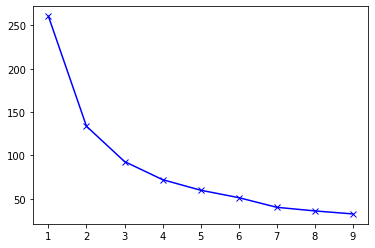

For n_clusters = 2 The average silhouette_score is : 0.6568536504294319
For n_clusters = 3 The average silhouette_score is : 0.5711381937868844
For n_clusters = 4 The average silhouette_score is : 0.5611347173642897
For n_clusters = 5 The average silhouette_score is : 0.5489993239795691
For n_clusters = 6 The average silhouette_score is : 0.5656413100386389
For n_clusters = 7 The average silhouette_score is : 0.5616196384056903
For n_clusters = 8 The average silhouette_score is : 0.5486213604076143
For n_clusters = 9 The average silhouette_score is : 0.5307235924738358


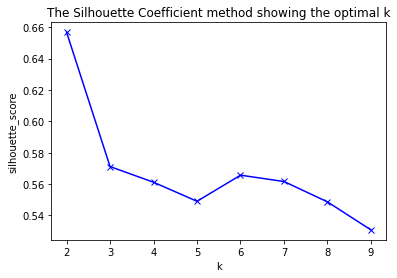

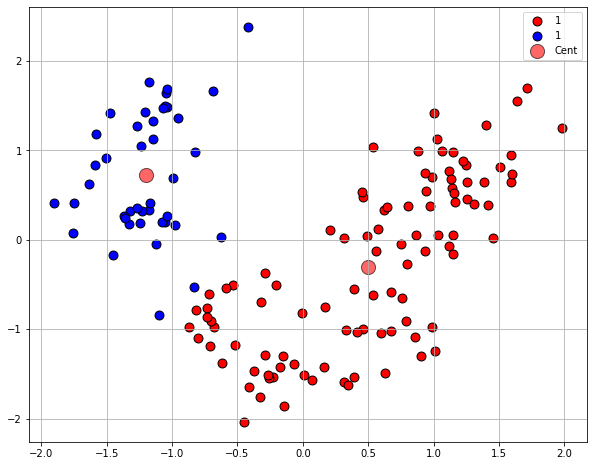

Kmeans with init= random. ACC: 0.6573033707865169
Kmeans with init= k-means++. ACC: 0.07303370786516854
number of estimated clusters : 4


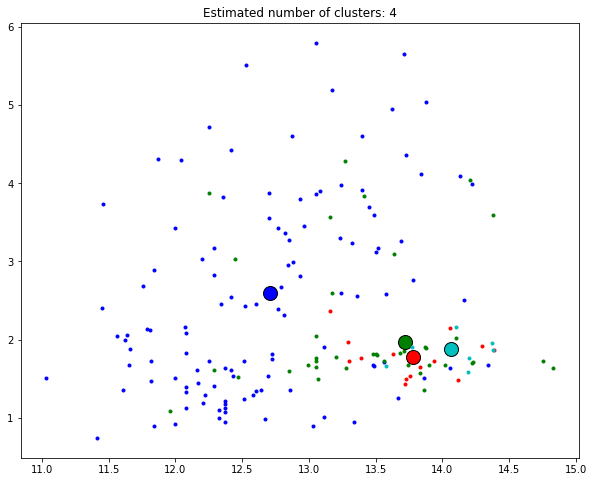

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score
from sklearn.cluster import MeanShift, estimate_bandwidth

from itertools import cycle

## Getting Db wine
seed = np.random.seed(61)

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

### zmniejsz wymiar datasetu,  korzystając  StandardScaler oraz PCA(n_components=2, whiten=True) -> tylko do wizualizacji
### narysuj wykres typu "scatter" -> sprawdź czy widać "klastry"

scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

pca = PCA(n_components=2, whiten=True)
X_reducted = pca.fit_transform(X_train_std)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

plt.figure(figsize=(8, 6))
plt.scatter(X_reducted[:, 0], X_reducted[:, 1], s=100)

plt.show()

### korzystając z metody "Elbow" wyznacz najlepszą liczbę n_clusters (wykorzystaj for loop, np range(1,11)) ->wykres
def ElbowMethod():
  distortions = []
  K = range(1, 10)
  for k in K:
      kmeanModel = KMeans(n_clusters=k)
      kmeanModel.fit(X)
      distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

  plt.plot(K, distortions, 'bx-')
  plt.show()

### korzystając z metryki silhouette_score, ponownie znajdź najlepszą liczbę n_clusters i porównaj z met. powyżej -> wykres,
def Silhouette():
  range_n_clusters = list(range(2, 10))
  silhouette_score = []

  for n_clusters in range_n_clusters:
      clusterer = KMeans(n_clusters=n_clusters, random_state=seed)
      cluster_labels = clusterer.fit_predict(X)

      silhouette_avg = metrics.silhouette_score(X, cluster_labels)
      silhouette_score.append(silhouette_avg)
      
      print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
      
  plt.plot(range_n_clusters, silhouette_score, 'bx-')
  plt.xlabel('k')
  plt.ylabel('silhouette_score')
  plt.title('The Silhouette Coefficient method showing the optimal k')
  plt.show()

### utwórz wykres typu "scatter", nadając każdemu punktowi kolor zgodny z danym klastrem
def GraphScatter():

  km_cls = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, random_state=seed)

  y_km = km_cls.fit_predict(X_reducted)
  km_cls.cluster_centers_

  plt.figure(figsize=(10, 8))

  plt.scatter(X_reducted[y_km == 0, 0], X_reducted[y_km == 0, 1], c='red', edgecolor='black', label='1', s=80)

  plt.scatter(X_reducted[y_km == 1, 0], X_reducted[y_km == 1, 1], c='blue', edgecolor='black', label='1', s=80)

  plt.scatter(km_cls.cluster_centers_[:, 0], km_cls.cluster_centers_[:, 1], c='r', marker="o", s=200, alpha=0.6, edgecolor="black", label='Cent')

  plt.legend()
  plt.grid()
  plt.show()

### wyznacz wartość accuracy, porównując numer klastra z kolumną "target" ('y')
### w algorytmie KMeans zmień init='random' na init='k-means++' i porównaj wyniki accuracy.
def AccuracyTarget():
  init_list = ["random", "k-means++"]

  for i in init_list:
      model = KMeans(n_clusters=2, init=i, n_init=10, max_iter=300, random_state=seed ) 
          
      model.fit(X, y)
      pred = model.predict(X)
      print(f"Kmeans with init= {i}. ACC: {accuracy_score(y, pred)}")

### Wyznacz liczbę klastrów korzystając z MeanShift i porównaj z pkt.1

def MEanShift():
  bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

  #
  ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
  ms.fit(X)
  labels = ms.labels_
  cluster_centers = ms.cluster_centers_

  labels_unique = np.unique(labels)
  n_clusters_ = len(labels_unique)

  print(f"number of estimated clusters : {n_clusters_}")

  plt.figure(figsize=(10, 8))
  plt.clf()

  colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  for k, col in zip(range(n_clusters_), colors):
      my_members = labels == k
      cluster_center = cluster_centers[k]
      plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
      plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
              markeredgecolor='k', markersize=14)
  plt.title(f'Estimated number of clusters: {n_clusters_}')
  plt.show()


ElbowMethod()

Silhouette()

GraphScatter()

AccuracyTarget()

MEanShift()